# 노드 따라하기!! (프로젝트는 아래쪽에!)

In [16]:
sentences = ['i feel hungry', 'i eat lunch', 'now i feel happy']

word_list = 'i feel hungry'.split()
print(word_list)

['i', 'feel', 'hungry']


In [17]:
index_to_word = {}

index_to_word[0] = '<PAD>'
index_to_word[1] = '<BOS>'
index_to_word[2] = '<UNK>'
index_to_word[3] = 'i'
index_to_word[4] = 'feel'
index_to_word[5] = 'hungry'
index_to_word[6] = 'eat'
index_to_word[7] = 'lunch'
index_to_word[8] = 'now'
index_to_word[9] = 'happy'

print(index_to_word)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


In [18]:
word_to_index = {word:index for index, word in index_to_word.items()}
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


In [19]:
print(word_to_index['feel'])

4


In [20]:
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']] + [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

print(get_encoded_sentence('i eat lunch', word_to_index))

[1, 3, 6, 7]


In [21]:
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

encoded_sentences = get_encoded_sentences(sentences, word_to_index)
print(encoded_sentences)

[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]


In [22]:
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])

print(get_decoded_sentence([1, 3, 4, 5], index_to_word))

i feel hungry


In [23]:
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

print(get_decoded_sentences(encoded_sentences, index_to_word))

['i feel hungry', 'i eat lunch', 'now i feel happy']


In [25]:
import numpy as np
import tensorflow as tf
import os

vocab_size = len(word_to_index)
word_vector_dim = 4

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype='object')
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs, 
                                              value=word_to_index['<PAD>'],
                                              padding='post',
                                              maxlen=5)
output = embedding(raw_inputs)
print(output)

tf.Tensor(
[[[-0.04473978  0.033767    0.031716    0.0356977 ]
  [ 0.04800184 -0.01293838  0.04369137  0.03882836]
  [ 0.00045777  0.04117789 -0.02848302 -0.01127741]
  [ 0.02161782 -0.02938337  0.04670374  0.03789597]
  [ 0.04983613  0.00269065 -0.01978065  0.03196811]]

 [[-0.04473978  0.033767    0.031716    0.0356977 ]
  [ 0.04800184 -0.01293838  0.04369137  0.03882836]
  [-0.03751893 -0.0097582   0.03523333  0.04517848]
  [-0.02500234 -0.00887238  0.02023629  0.04723766]
  [ 0.04983613  0.00269065 -0.01978065  0.03196811]]

 [[-0.04473978  0.033767    0.031716    0.0356977 ]
  [ 0.01397545 -0.01816612 -0.00253273  0.04015949]
  [ 0.04800184 -0.01293838  0.04369137  0.03882836]
  [ 0.00045777  0.04117789 -0.02848302 -0.01127741]
  [ 0.0405844  -0.02010299  0.00163462  0.04791028]]], shape=(3, 5, 4), dtype=float32)


In [26]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 416       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


In [27]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          464       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [28]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [29]:
imdb = tf.keras.datasets.imdb

# IMDb 데이터셋 다운로드 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(x_train), len(x_test)))

17473536/17464789 [==============================] - 0s 0us/step
훈련 샘플 개수: 25000, 테스트 개수: 25000


In [30]:
print(x_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(x_train[0]))
print('2번째 리뷰 문장 길이: ', len(x_train[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨:  1
1번째 리뷰 문장 길이:  218
2번째 리뷰 문장 길이:  189


In [31]:
word_to_index = imdb.get_word_index()
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1])     # 'the' 가 출력됩니다. 
print(word_to_index['the'])  # 1 이 출력됩니다.

1654784/1641221 [==============================] - 0s 0us/step
the
1


In [32]:
#실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있습니다.  
word_to_index = {k:(v+3) for k,v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])     # '<BOS>' 가 출력됩니다. 
print(word_to_index['the'])  # 4 이 출력됩니다. 
print(index_to_word[4])     # 'the' 가 출력됩니다.

<BOS>
4
the


In [33]:
print(get_decoded_sentence(x_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

In [34]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  234.75892
문장길이 최대 :  2494
문장길이 표준편차 :  172.91149458735703
pad_sequences maxlen :  580
전체 문장의 0.94536%가 maxlen 설정값 이내에 포함됩니다. 


In [35]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train.shape)

(25000, 580)


In [36]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model = tf.keras.Sequential()
# [[YOUR CODE]]
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


In [37]:
# validation set 10000건 분리
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


In [38]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 21s 47ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy: 0.4959
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6929 - accuracy: 0.5120 - val_loss: 0.6930 - val_accuracy: 0.5014
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6923 - accuracy: 0.5060 - val_loss: 0.6923 - val_accuracy: 0.5021
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6888 - accuracy: 0.5184 - val_loss: 0.6890 - val_accuracy: 0.5118
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6819 - accuracy: 0.5445 - val_loss: 0.6879 - val_accuracy: 0.5119
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6807 - accuracy: 0.5286 - val_loss: 0.6870 - val_accuracy: 0.5112
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6771 - accuracy: 0.5329 - val_loss: 0.6874 - val_accuracy: 0.5106
Epoch 8/20
3

In [39]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 5s - loss: 0.6305 - accuracy: 0.6355
[0.6304698586463928, 0.6354799866676331]


In [40]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


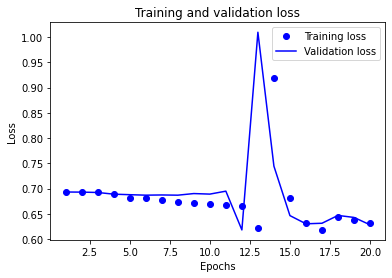

In [41]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

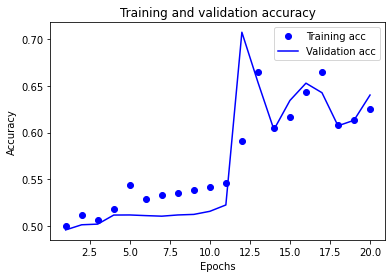

In [42]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [43]:
# 제대로 된 동작을 위해 버젼을 다운그레이드
!pip install gensim

!pip install --upgrade gensim==3.8.3

     |████████████████████████████████| 23.4 MB 5.5 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=24328218 sha256=f05bf77a8e75ff01fc13428838a4fb02f8e927dcf5e14affcc8879ddfefd2bca
  Stored in directory: /aiffel/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.1.2
    Uninstalling gensim-4.1.2:
      Successfully uninstalled gensim-4.1.2


In [44]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [45]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [46]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

array([-0.03432446,  0.04224148, -0.002476  ,  0.084374  , -0.05866981,
        0.00873459,  0.07701198,  0.04851301,  0.04174719,  0.01149173,
        0.07911645,  0.07712336,  0.04568939,  0.04858962, -0.07104567,
       -0.03551871], dtype=float32)

In [47]:
word_vectors.similar_by_word("love")

[('county', 0.8777061700820923),
 ('featuring', 0.8740423917770386),
 ('torment', 0.8698670864105225),
 ('condemned', 0.8678135871887207),
 ('mandy', 0.865607738494873),
 ('affairs', 0.8629537224769592),
 ('geeky', 0.8611271977424622),
 ('often', 0.8494324684143066),
 ('essential', 0.8424042463302612),
 ('charge', 0.8341334462165833)]

In [48]:
from gensim.models import KeyedVectors

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
vector = word2vec['computer']
vector     # 무려 300dim의 워드 벡터입니다.

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [49]:
# 메모리를 다소 많이 소비하는 작업이니 유의해 주세요.
word2vec.similar_by_word("love")

[('loved', 0.6907792091369629),
 ('adore', 0.6816873550415039),
 ('loves', 0.6618633270263672),
 ('passion', 0.6100709438323975),
 ('hate', 0.600395679473877),
 ('loving', 0.5886635780334473),
 ('affection', 0.5664337873458862),
 ('undying_love', 0.5547305345535278),
 ('absolutely_adore', 0.5536839962005615),
 ('adores', 0.5440906882286072)]

In [51]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

In [52]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원 수 

# 모델 구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 580, 300)          3000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 574, 16)           33616     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 114, 16)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 108, 16)           1808      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [53]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 16s 90ms/step - loss: 0.6922 - accuracy: 0.5322 - val_loss: 0.6873 - val_accuracy: 0.5420
Epoch 2/20
30/30 [==============================] - 2s 72ms/step - loss: 0.6736 - accuracy: 0.5881 - val_loss: 0.6504 - val_accuracy: 0.6353
Epoch 3/20
30/30 [==============================] - 2s 73ms/step - loss: 0.5888 - accuracy: 0.7169 - val_loss: 0.5278 - val_accuracy: 0.7416
Epoch 4/20
30/30 [==============================] - 2s 73ms/step - loss: 0.4077 - accuracy: 0.8323 - val_loss: 0.3557 - val_accuracy: 0.8499
Epoch 5/20
30/30 [==============================] - 2s 73ms/step - loss: 0.2895 - accuracy: 0.8813 - val_loss: 0.3301 - val_accuracy: 0.8591
Epoch 6/20
30/30 [==============================] - 2s 73ms/step - loss: 0.2137 - accuracy: 0.9193 - val_loss: 0.3036 - val_accuracy: 0.8721
Epoch 7/20
30/30 [==============================] - 2s 74ms/step - loss: 0.1615 - accuracy: 0.9434 - val_loss: 0.3085 - val_accuracy: 0.8731
Epoch 8/20
3

In [54]:
# 테스트셋을 통한 모델 평가
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 2s - loss: 0.5798 - accuracy: 0.8537
[0.5798423290252686, 0.8536800146102905]


---
---

# 프로젝트 : 네이버 영화리뷰 감성분석 도전하기

## 1) 데이터 준비와 확인

In [278]:
import pandas as pd

# 데이터를 읽어봅시다. 
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


## 2) 데이터로더 구성

In [279]:
from konlpy.tag import Mecab
import numpy as np
from collections import Counter

tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    # [[YOUR CODE]]
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
        
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)
index_to_word = {index:word for word, index in word_to_index.items()}

In [280]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [281]:
print(get_decoded_sentence(X_train[0], index_to_word))
print(y_train[0])

더 빙 . . 진짜 짜증 나 네요 목소리
0


## 3) 모델 구성을 위한 데이터 분석 및 가공

* 데이터셋 내 문장 길이 분포
* 적절한 최대 문장 길이 지정

In [283]:
total_data_text = list(X_train) + list(X_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2.5*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2.5 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  15.96940191154864
문장길이 최대 :  116
문장길이 표준편차 :  12.843571191092
pad_sequences maxlen :  48
전체 문장의 0.9548784420929768%가 maxlen 설정값 이내에 포함됩니다. 


In [285]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # pre 성능이 좋다고 함
                                                        maxlen=maxlen)

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre', # pre 성능이 좋다고 함
                                                       maxlen=maxlen)

print(X_train.shape)
print(X_test.shape)

(146182, 48)
(49157, 48)


## 4) 모델 구성 및 validation set 구성

In [286]:
print(len(X_train)*0.15)

21927.3


In [287]:
# 22000개를 validation set으로 지정
X_val = X_train[:22000]
y_val = y_train[:22000]

partial_X_train = X_train[22000:]
partial_y_train = y_train[22000:]

print(partial_X_train.shape)
print(partial_y_train.shape)

(124182, 48)
(124182,)


### RNN with GRU

In [288]:
vocab_size = 10000  # 어휘 사전의 크기(10,000개의 단어)
word_vector_dim = 200  # 단어 하나를 표현하는 임베딩 벡터의 차원 

model_0 = tf.keras.Sequential()
model_0.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_0.add(tf.keras.layers.GRU(128))           # RNN에서 가장 많이 쓰는 LSTM 모델
model_0.add(tf.keras.layers.Dense(16, activation='relu'))
model_0.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1 dim 

model_0.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_56 (Embedding)     (None, None, 200)         2000000   
_________________________________________________________________
gru_17 (GRU)                 (None, 128)               126720    
_________________________________________________________________
dense_78 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 17        
Total params: 2,128,801
Trainable params: 2,128,801
Non-trainable params: 0
_________________________________________________________________


### 1-D CNN

In [289]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_1.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model_1.add(tf.keras.layers.MaxPooling1D(5))
model_1.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model_1.add(tf.keras.layers.GlobalMaxPooling1D())
model_1.add(tf.keras.layers.Dense(8, activation='relu'))
model_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model_1.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_57 (Embedding)     (None, None, 200)         2000000   
_________________________________________________________________
conv1d_10 (Conv1D)           (None, None, 16)          22416     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 16)                0         
_________________________________________________________________
dense_80 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_81 (Dense)             (None, 1)               

### GlobalMaxPooling1D 이용한 모델

In [290]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_2.add(tf.keras.layers.GlobalMaxPooling1D())
model_2.add(tf.keras.layers.Dense(8, activation='relu'))
model_2.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model_2.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_58 (Embedding)     (None, None, 200)         2000000   
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 200)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 8)                 1608      
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 9         
Total params: 2,001,617
Trainable params: 2,001,617
Non-trainable params: 0
_________________________________________________________________


## 5) 모델 훈련 개시

### RNN with GRU

In [292]:
model_0.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model_0.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    callbacks = early,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
486/486 [==============================] - 7s 11ms/step - loss: 0.1374 - accuracy: 0.9459 - val_loss: 0.4130 - val_accuracy: 0.8640
Epoch 2/10
486/486 [==============================] - 5s 11ms/step - loss: 0.1019 - accuracy: 0.9611 - val_loss: 0.4919 - val_accuracy: 0.8592
Epoch 3/10
486/486 [==============================] - 5s 11ms/step - loss: 0.0781 - accuracy: 0.9699 - val_loss: 0.6137 - val_accuracy: 0.8561
Epoch 4/10
486/486 [==============================] - 5s 11ms/step - loss: 0.0619 - accuracy: 0.9762 - val_loss: 0.7365 - val_accuracy: 0.8573
Epoch 5/10
486/486 [==============================] - 5s 11ms/step - loss: 0.0498 - accuracy: 0.9802 - val_loss: 0.8518 - val_accuracy: 0.8503
Epoch 6/10
486/486 [==============================] - 5s 11ms/step - loss: 0.0408 - accuracy: 0.9837 - val_loss: 0.9489 - val_accuracy: 0.8490
Epoch 00006: early stopping


### 1-D CNN

In [295]:
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history_1 = model_1.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    callbacks = early,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
486/486 [==============================] - 4s 6ms/step - loss: 0.4515 - accuracy: 0.7766 - val_loss: 0.3811 - val_accuracy: 0.8218
Epoch 2/10
486/486 [==============================] - 3s 5ms/step - loss: 0.3322 - accuracy: 0.8519 - val_loss: 0.3733 - val_accuracy: 0.8276
Epoch 3/10
486/486 [==============================] - 3s 5ms/step - loss: 0.2581 - accuracy: 0.8908 - val_loss: 0.3992 - val_accuracy: 0.8235
Epoch 4/10
486/486 [==============================] - 3s 6ms/step - loss: 0.1811 - accuracy: 0.9264 - val_loss: 0.4612 - val_accuracy: 0.8166
Epoch 5/10
486/486 [==============================] - 3s 6ms/step - loss: 0.1277 - accuracy: 0.9484 - val_loss: 0.5661 - val_accuracy: 0.8126
Epoch 6/10
486/486 [==============================] - 3s 6ms/step - loss: 0.0965 - accuracy: 0.9600 - val_loss: 0.6504 - val_accuracy: 0.8085
Epoch 7/10
486/486 [==============================] - 3s 6ms/step - loss: 0.0800 - accuracy: 0.9658 - val_loss: 0.7577 - val_accuracy: 0.8012
Epoch 

### GlobalMaxPooling1D 이용한 모델

In [296]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history_2 = model_2.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    callbacks = early,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
486/486 [==============================] - 2s 4ms/step - loss: 0.4236 - accuracy: 0.8096 - val_loss: 0.3366 - val_accuracy: 0.8522
Epoch 2/10
486/486 [==============================] - 2s 4ms/step - loss: 0.2992 - accuracy: 0.8745 - val_loss: 0.3342 - val_accuracy: 0.8557
Epoch 3/10
486/486 [==============================] - 2s 4ms/step - loss: 0.2500 - accuracy: 0.8994 - val_loss: 0.3443 - val_accuracy: 0.8565
Epoch 4/10
486/486 [==============================] - 2s 4ms/step - loss: 0.2035 - accuracy: 0.9221 - val_loss: 0.3660 - val_accuracy: 0.8536
Epoch 5/10
486/486 [==============================] - 2s 4ms/step - loss: 0.1553 - accuracy: 0.9442 - val_loss: 0.4022 - val_accuracy: 0.8497
Epoch 6/10
486/486 [==============================] - 2s 4ms/step - loss: 0.1096 - accuracy: 0.9641 - val_loss: 0.4538 - val_accuracy: 0.8470
Epoch 7/10
486/486 [==============================] - 2s 4ms/step - loss: 0.0727 - accuracy: 0.9784 - val_loss: 0.5151 - val_accuracy: 0.8447
Epoch 

## 6) Loss, Accuracy 그래프 시각화

#### RNN

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


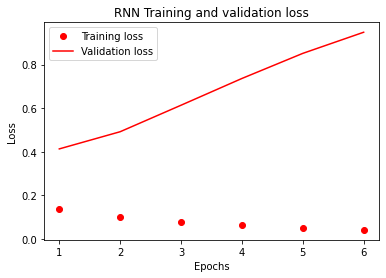

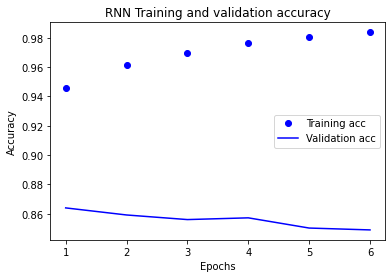

In [293]:
## Loss, Accuracy 그래프 시각화

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'ro', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('RNN Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('RNN Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [294]:
# test 결과
results = model_0.evaluate(X_test, y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.9371 - accuracy: 0.8477
[0.9370606541633606, 0.8477124571800232]


처음엔 배치사이즈를 256으로 했었는데 validation 성능의 개선이 없어 배치사이즈를 32로 대폭 줄였다.  
그럼에도 성능에서 큰 차이를 보이지 않고 3 epochs 이후부터는 오히려 성능이 하락하는 모습을 보인다.

#### 1-D CNN

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


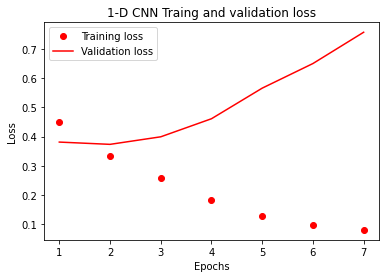

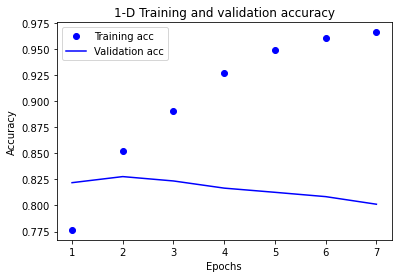

In [297]:
## Loss, Accuracy 그래프 시각화

history_dict_1 = history_1.history
print(history_dict_1.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict_1['accuracy']
val_acc = history_dict_1['val_accuracy']
loss = history_dict_1['loss']
val_loss = history_dict_1['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'ro', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('1-D CNN Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('1-D Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [298]:
# test 결과
results_1 = model_1.evaluate(X_test, y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.7765 - accuracy: 0.8006
[0.9370606541633606, 0.8477124571800232]


### GlobalMaxPooling1D

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


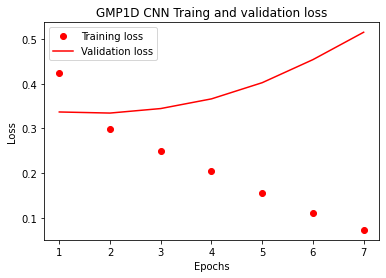

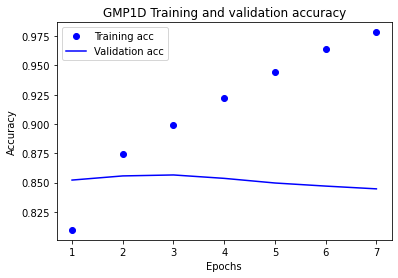

In [299]:
## Loss, Accuracy 그래프 시각화

history_dict_2 = history_2.history
print(history_dict_2.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

acc = history_dict_2['accuracy']
val_acc = history_dict_2['val_accuracy']
loss = history_dict_2['loss']
val_loss = history_dict_2['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'ro', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('GMP1D CNN Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('GMP1D Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [300]:
# test 결과
results_2 = model_2.evaluate(X_test, y_test, verbose=2)

print(results)

1537/1537 - 2s - loss: 0.5202 - accuracy: 0.8414
[0.9370606541633606, 0.8477124571800232]


## 7) 학습된 Embedding 레이어 분석

In [ ]:
# 제대로 된 동작을 위해 버젼을 다운그레이드
# 위에서 수행해주었기에 건너뜀
#!pip install gensim
#!pip install --upgrade gensim==3.8.3

In [302]:
embedding_layer = model_0.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 200)


In [303]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model_0.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [305]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
print(word_vectors['사랑'])

[ 0.09303488  0.11226439 -0.14461125 -0.01034935  0.17099279  0.16874948
  0.07331345  0.05238518 -0.1526046   0.05265008 -0.11662525 -0.04014652
  0.17379928 -0.18306373  0.21060051  0.08134997 -0.09312661 -0.05729796
 -0.15048337 -0.05917407 -0.14463818 -0.11725764  0.17214611 -0.16570346
 -0.22153911 -0.08180784 -0.19435255  0.13462299  0.1323443   0.08340842
 -0.0956464   0.2896274  -0.05161378 -0.24549794  0.21973419  0.05814346
 -0.13509732  0.2947406  -0.00632603  0.19925994 -0.05230223 -0.09497326
 -0.16806538  0.19501805 -0.25471586 -0.02157324 -0.12078029  0.02421105
 -0.07810222 -0.14105077  0.02026598  0.08733696  0.1386075   0.03223716
 -0.16870937  0.14957407 -0.14688338 -0.0277502  -0.12144175 -0.12996809
 -0.25861993  0.1210236  -0.01873659 -0.12909257 -0.2597795  -0.12792194
 -0.05494439  0.12313418  0.25588626  0.14744562 -0.15495443  0.0146777
  0.01767084 -0.15807788 -0.10619538  0.20337923  0.23458655  0.16803838
  0.02549509 -0.10254306 -0.1564999   0.04348457 -0.

In [306]:
word_vectors.similar_by_word("사랑")

[('눈물', 0.8379384279251099),
 ('소장', 0.8142290115356445),
 ('재밌', 0.8055227994918823),
 ('토로', 0.8043040037155151),
 ('좋', 0.8008660078048706),
 ('밋', 0.7988518476486206),
 ('조기', 0.7987930774688721),
 ('명작', 0.7960962057113647),
 ('통일', 0.7936319708824158),
 ('묘', 0.7934836745262146)]

## 8) 한국어 Word2Vec 임베딩 활용하여 성능 개선

https://github.com/Kyubyong/wordvectors 에서 한국어 Word2vec 자료 확보

In [307]:
from gensim.models import Word2Vec

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/ko.bin'
word2vec = Word2Vec.load(word2vec_path)
vector = word2vec['사랑']
print(vector)

[-1.3740246  -1.7353463   3.3915305  -2.569253   -1.4016607   1.4556127
  0.9414557   1.9207907   0.16471806  0.4838317  -0.8547181   2.0879807
  0.86741775  0.87539405 -0.09962013  0.22928311 -1.1858722   0.00858838
  1.4999928  -0.16196461 -0.35184434 -0.92390764  1.0849575   0.3025011
  2.7021565  -1.0263684   0.32864776 -0.76589465 -2.510981   -0.66225356
  2.8434615   0.50130975 -1.021874   -1.4366034   1.1110784   0.5812605
 -0.5830406  -0.5785423   1.3634988   2.3074338  -1.4314893   0.45745876
  1.1073523  -3.2135262  -0.2898375  -1.1622221   1.2369208  -0.7622987
 -0.37757635  1.1376442   0.01065568 -0.69105595  1.5159112   1.1534518
 -1.0119992  -0.5757404   1.1349088  -1.1289831   0.13004152  2.0451715
 -0.23940353  1.3604902   0.72700524  0.32545742  1.0612459   0.42252553
  1.1442151   2.8774905   2.4377263  -1.340305    0.12629706 -0.07772489
 -0.59053177 -0.19007324  0.1396541  -1.8655105   0.9401054   0.5150856
  0.7795373  -0.86505556  0.11842118 -1.8303713   1.337177 

/tmp/ipykernel_13/3352817960.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vector = word2vec['사랑']


In [308]:
# 메모리를 다소 많이 소비하는 작업이니 유의해 주세요.
word2vec.similar_by_word("사랑")

/tmp/ipykernel_13/1098788216.py:2: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  word2vec.similar_by_word("사랑")


[('슬픔', 0.7216662764549255),
 ('행복', 0.6759077310562134),
 ('절망', 0.6468985080718994),
 ('기쁨', 0.6458414196968079),
 ('이별', 0.6334798336029053),
 ('추억', 0.6320937275886536),
 ('인생', 0.6216273307800293),
 ('애정', 0.6206069588661194),
 ('연인', 0.6186063289642334),
 ('유혹', 0.5965287685394287)]

In [309]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 200  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

/tmp/ipykernel_13/1730871920.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if index_to_word[i] in word2vec:
/tmp/ipykernel_13/1730871920.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_matrix[i] = word2vec[index_to_word[i]]


#### 모델 생성

In [310]:
# RNN with GRU
e_model_0 = tf.keras.Sequential()
e_model_0.add(tf.keras.layers.Embedding(vocab_size, 
                                        word_vector_dim, 
                                        embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                        input_length=maxlen, 
                                        trainable=True))   # trainable을 True로 주면 Fine-tuning)
e_model_0.add(tf.keras.layers.GRU(128))           # RNN에서 가장 많이 쓰는 LSTM 모델의 개선버젼
e_model_0.add(tf.keras.layers.Dense(16, activation='relu'))
e_model_0.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1 dim 

e_model_0.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_59 (Embedding)     (None, 48, 200)           2000000   
_________________________________________________________________
gru_18 (GRU)                 (None, 128)               126720    
_________________________________________________________________
dense_84 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 17        
Total params: 2,128,801
Trainable params: 2,128,801
Non-trainable params: 0
_________________________________________________________________


In [311]:
# 1D CNN
e_model_1 = tf.keras.Sequential()
e_model_1.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim,
                                        embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                        input_length=maxlen, 
                                        trainable=True))   # trainable을 True로 주면 Fine-tuning))
e_model_1.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
e_model_1.add(tf.keras.layers.MaxPooling1D(5))
e_model_1.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
e_model_1.add(tf.keras.layers.GlobalMaxPooling1D())
e_model_1.add(tf.keras.layers.Dense(8, activation='relu'))
e_model_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

e_model_1.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_60 (Embedding)     (None, 48, 200)           2000000   
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 42, 16)            22416     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 8, 16)             0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 2, 16)             1808      
_________________________________________________________________
global_max_pooling1d_10 (Glo (None, 16)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_87 (Dense)             (None, 1)               

In [323]:
# GlobalMaxPooling1D
e_model_2 = tf.keras.Sequential()
e_model_2.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, 
                                      embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                      input_length=maxlen, 
                                      trainable=True))   # trainable을 True로 주면 Fine-tuning))
e_model_2.add(tf.keras.layers.GlobalMaxPooling1D())
e_model_2.add(tf.keras.layers.Dense(8, activation='relu'))
e_model_2.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

e_model_2.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_63 (Embedding)     (None, 48, 200)           2000000   
_________________________________________________________________
global_max_pooling1d_13 (Glo (None, 200)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 8)                 1608      
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 9         
Total params: 2,001,617
Trainable params: 2,001,617
Non-trainable params: 0
_________________________________________________________________


#### 학습

In [313]:
# RNN with GRU
e_model_0.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

e_history = e_model_0.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    callbacks = early,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
486/486 [==============================] - 6s 9ms/step - loss: 0.4224 - accuracy: 0.8011 - val_loss: 0.3344 - val_accuracy: 0.8506
Epoch 2/10
486/486 [==============================] - 4s 8ms/step - loss: 0.3065 - accuracy: 0.8686 - val_loss: 0.3209 - val_accuracy: 0.8582
Epoch 3/10
486/486 [==============================] - 4s 8ms/step - loss: 0.2663 - accuracy: 0.8894 - val_loss: 0.3201 - val_accuracy: 0.8614
Epoch 4/10
486/486 [==============================] - 4s 8ms/step - loss: 0.2348 - accuracy: 0.9047 - val_loss: 0.3114 - val_accuracy: 0.8707
Epoch 5/10
486/486 [==============================] - 4s 8ms/step - loss: 0.2062 - accuracy: 0.9170 - val_loss: 0.3274 - val_accuracy: 0.8678
Epoch 6/10
486/486 [==============================] - 4s 8ms/step - loss: 0.1747 - accuracy: 0.9312 - val_loss: 0.3567 - val_accuracy: 0.8667
Epoch 7/10
486/486 [==============================] - 4s 8ms/step - loss: 0.1460 - accuracy: 0.9428 - val_loss: 0.4112 - val_accuracy: 0.8650
Epoch 

In [314]:
e_results_0 = e_model_0.evaluate(X_test, y_test, verbose=2)

print(e_results_0)

1537/1537 - 3s - loss: 0.4906 - accuracy: 0.8525
[0.4906134605407715, 0.8525133728981018]


In [315]:
# 1D CNN
e_model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

e_history_1 = e_model_1.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    callbacks = early,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
486/486 [==============================] - 3s 6ms/step - loss: 0.5413 - accuracy: 0.7164 - val_loss: 0.4543 - val_accuracy: 0.7830
Epoch 2/10
486/486 [==============================] - 3s 6ms/step - loss: 0.4050 - accuracy: 0.8134 - val_loss: 0.4080 - val_accuracy: 0.8086
Epoch 3/10
486/486 [==============================] - 3s 6ms/step - loss: 0.3532 - accuracy: 0.8415 - val_loss: 0.3974 - val_accuracy: 0.8160
Epoch 4/10
486/486 [==============================] - 3s 6ms/step - loss: 0.3226 - accuracy: 0.8581 - val_loss: 0.4053 - val_accuracy: 0.8140
Epoch 5/10
486/486 [==============================] - 3s 6ms/step - loss: 0.2953 - accuracy: 0.8724 - val_loss: 0.4131 - val_accuracy: 0.8137
Epoch 6/10
486/486 [==============================] - 3s 6ms/step - loss: 0.2709 - accuracy: 0.8837 - val_loss: 0.4254 - val_accuracy: 0.8117
Epoch 7/10
486/486 [==============================] - 3s 5ms/step - loss: 0.2462 - accuracy: 0.8967 - val_loss: 0.4494 - val_accuracy: 0.8095
Epoch 

In [316]:
e_results_1 = e_model_1.evaluate(X_test, y_test, verbose=2)

print(e_results_1)

1537/1537 - 3s - loss: 0.4775 - accuracy: 0.8111
[0.4775051474571228, 0.8111153841018677]


In [324]:
# GlobalMaxPooling1D
e_model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

e_history_2 = e_model_2.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    callbacks = early,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/20
486/486 [==============================] - 3s 4ms/step - loss: 0.6513 - accuracy: 0.6239 - val_loss: 0.5734 - val_accuracy: 0.7021
Epoch 2/20
486/486 [==============================] - 2s 4ms/step - loss: 0.5242 - accuracy: 0.7382 - val_loss: 0.4889 - val_accuracy: 0.7625
Epoch 3/20
486/486 [==============================] - 2s 4ms/step - loss: 0.4527 - accuracy: 0.7864 - val_loss: 0.4429 - val_accuracy: 0.7912
Epoch 4/20
486/486 [==============================] - 2s 4ms/step - loss: 0.4087 - accuracy: 0.8134 - val_loss: 0.4210 - val_accuracy: 0.8049
Epoch 5/20
486/486 [==============================] - 2s 4ms/step - loss: 0.3802 - accuracy: 0.8301 - val_loss: 0.4101 - val_accuracy: 0.8112
Epoch 6/20
486/486 [==============================] - 2s 4ms/step - loss: 0.3576 - accuracy: 0.8427 - val_loss: 0.3968 - val_accuracy: 0.8194
Epoch 7/20
486/486 [==============================] - 2s 4ms/step - loss: 0.3388 - accuracy: 0.8535 - val_loss: 0.3947 - val_accuracy: 0.8215
Epoch 

In [325]:
e_results_2 = e_model_2.evaluate(X_test, y_test, verbose=2)

print(e_results_2)

1537/1537 - 2s - loss: 0.4194 - accuracy: 0.8284
[0.4194493889808655, 0.8284069299697876]


### 여러 방식으로 도전!!!

In [326]:
# RNN with LSTM
e_model_t = tf.keras.Sequential()
e_model_t.add(tf.keras.layers.Embedding(vocab_size, 
                                        word_vector_dim, 
                                        embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                        input_length=maxlen, 
                                        trainable=True))   # trainable을 True로 주면 Fine-tuning)
e_model_t.add(tf.keras.layers.LSTM(128))           # RNN에서 가장 많이 쓰는 LSTM 모델의 개선버젼
e_model_t.add(tf.keras.layers.Dense(16, activation='relu'))
e_model_t.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1 dim 

e_model_t.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_64 (Embedding)     (None, 48, 200)           2000000   
_________________________________________________________________
lstm_35 (LSTM)               (None, 128)               168448    
_________________________________________________________________
dense_94 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 17        
Total params: 2,170,529
Trainable params: 2,170,529
Non-trainable params: 0
_________________________________________________________________


In [327]:
# RNN with LSTM
e_model_t.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

e_history_t = e_model_t.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    callbacks = early,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
486/486 [==============================] - 6s 10ms/step - loss: 0.4180 - accuracy: 0.8039 - val_loss: 0.3392 - val_accuracy: 0.8510
Epoch 2/10
486/486 [==============================] - 5s 9ms/step - loss: 0.3073 - accuracy: 0.8686 - val_loss: 0.3240 - val_accuracy: 0.8607
Epoch 3/10
486/486 [==============================] - 5s 10ms/step - loss: 0.2664 - accuracy: 0.8889 - val_loss: 0.3187 - val_accuracy: 0.8648
Epoch 4/10
486/486 [==============================] - 5s 10ms/step - loss: 0.2330 - accuracy: 0.9048 - val_loss: 0.3139 - val_accuracy: 0.8668
Epoch 5/10
486/486 [==============================] - 5s 10ms/step - loss: 0.2046 - accuracy: 0.9180 - val_loss: 0.3334 - val_accuracy: 0.8680
Epoch 6/10
486/486 [==============================] - 5s 10ms/step - loss: 0.1720 - accuracy: 0.9321 - val_loss: 0.3585 - val_accuracy: 0.8636
Epoch 7/10
486/486 [==============================] - 5s 10ms/step - loss: 0.1424 - accuracy: 0.9450 - val_loss: 0.3868 - val_accuracy: 0.8654


In [328]:
e_results_t = e_model_t.evaluate(X_test, y_test, verbose=2)

print(e_results_t)

1537/1537 - 4s - loss: 0.5245 - accuracy: 0.8560
[0.5244756937026978, 0.8559716939926147]


* LSTM의 optimizer를 RMSprop으로 설정하면 어떤 결과를 가져올지???

In [329]:
# RNN with LSTM
e_model_t2 = tf.keras.Sequential()
e_model_t2.add(tf.keras.layers.Embedding(vocab_size, 
                                        word_vector_dim, 
                                        embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                        input_length=maxlen, 
                                        trainable=True))   # trainable을 True로 주면 Fine-tuning)
e_model_t2.add(tf.keras.layers.LSTM(128))           # RNN에서 가장 많이 쓰는 LSTM 모델의 개선버젼
e_model_t2.add(tf.keras.layers.Dense(16, activation='relu'))
e_model_t2.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1 dim 

e_model_t2.summary()

# RNN
e_model_t2.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

e_history_t2 = e_model_t2.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    callbacks = early,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    verbose=1)

e_results_t2 = e_model_t2.evaluate(X_test, y_test, verbose=2)

print(e_results_t2)

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_65 (Embedding)     (None, 48, 200)           2000000   
_________________________________________________________________
lstm_36 (LSTM)               (None, 128)               168448    
_________________________________________________________________
dense_96 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 17        
Total params: 2,170,529
Trainable params: 2,170,529
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
486/486 [==============================] - 7s 12ms/step - loss: 0.4404 - accuracy: 0.7898 - val_loss: 0.3589 - val_accuracy: 0.8395
Epoch 2/10
486/486 [==============================] - 4s 9ms/step - loss: 0.3262 - accuracy: 0.858

GRU와 SimpleRNN을 조합하면?

In [347]:
#GRU + SimpleRNN
e_model_t3 = tf.keras.Sequential()
e_model_t3.add(tf.keras.layers.Embedding(vocab_size, 
                                        word_vector_dim, 
                                        embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                        input_length=maxlen, 
                                        trainable=True))   # trainable을 True로 주면 Fine-tuning)
e_model_t3.add(tf.keras.layers.GRU(256, return_sequences=True))           # RNN에서 가장 많이 쓰는 LSTM 모델의 개선버젼
e_model_t3.add(tf.keras.layers.SimpleRNN(128))
e_model_t3.add(tf.keras.layers.Dense(16, activation='relu'))
e_model_t3.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1 dim 

e_model_t3.summary()

e_model_t3.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

e_history_t3 = e_model_t3.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    callbacks = early,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    verbose=1)

e_results_t3 = e_model_t3.evaluate(X_test, y_test, verbose=2)

print(e_results_t3)

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_75 (Embedding)     (None, 48, 200)           2000000   
_________________________________________________________________
gru_23 (GRU)                 (None, 48, 256)           351744    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 128)               49280     
_________________________________________________________________
dense_114 (Dense)            (None, 16)                2064      
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 17        
Total params: 2,403,105
Trainable params: 2,403,105
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
486/486 [==============================] - 28s 55ms/step - loss: 0.4563 - accuracy: 0.7799 - val_l

In [331]:
# Bidirectional
e_model_t3 = tf.keras.Sequential()
e_model_t3.add(tf.keras.layers.Embedding(vocab_size, 
                                        word_vector_dim, 
                                        embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                        input_length=maxlen, 
                                        trainable=True))   # trainable을 True로 주면 Fine-tuning)
e_model_t3.add(tf.keras.layers.GRU(64, return_sequences=True))           # RNN에서 가장 많이 쓰는 LSTM 모델의 개선버젼
e_model_t3.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)))
e_model_t3.add(tf.keras.layers.Dense(16, activation='relu'))
e_model_t3.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1 dim 

e_model_t3.summary()

e_model_t3.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

e_history_t3 = e_model_t3.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    callbacks = early,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    verbose=1)

e_results_t3 = e_model_t3.evaluate(X_test, y_test, verbose=2)

print(e_results_t3)

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_67 (Embedding)     (None, 48, 200)           2000000   
_________________________________________________________________
gru_20 (GRU)                 (None, 48, 64)            51072     
_________________________________________________________________
bidirectional_8 (Bidirection (None, 64)                18816     
_________________________________________________________________
dense_100 (Dense)            (None, 16)                1040      
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 17        
Total params: 2,070,945
Trainable params: 2,070,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
486/486 [==============================] - 10s 13ms/step - loss: 0.4464 - accuracy: 0.7856 - val_l

LSTM을 여러겹 쌓으면??

In [332]:
# RNN with Deep LSTM
e_model_t2 = tf.keras.Sequential()
e_model_t2.add(tf.keras.layers.Embedding(vocab_size, 
                                        word_vector_dim, 
                                        embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                        input_length=maxlen, 
                                        trainable=True))   # trainable을 True로 주면 Fine-tuning)
e_model_t2.add(tf.keras.layers.LSTM(32, return_sequences=True))           # RNN에서 가장 많이 쓰는 LSTM 모델
e_model_t2.add(tf.keras.layers.LSTM(32, return_sequences=True))
e_model_t2.add(tf.keras.layers.LSTM(32, return_sequences=True))
e_model_t2.add(tf.keras.layers.LSTM(32, return_sequences=False))
e_model_t2.add(tf.keras.layers.Dense(16, activation='relu'))
e_model_t2.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1 dim 

e_model_t2.summary()

# RNN
e_model_t2.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

e_history_t2 = e_model_t2.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    callbacks = early,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    verbose=1)

e_results_t2 = e_model_t2.evaluate(X_test, y_test, verbose=2)

print(e_results_t2)

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_68 (Embedding)     (None, 48, 200)           2000000   
_________________________________________________________________
lstm_37 (LSTM)               (None, 48, 32)            29824     
_________________________________________________________________
lstm_38 (LSTM)               (None, 48, 32)            8320      
_________________________________________________________________
lstm_39 (LSTM)               (None, 48, 32)            8320      
_________________________________________________________________
lstm_40 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_102 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_103 (Dense)            (None, 1)               

LSTM의 필터수를 줄여보자!!

In [333]:
# RNN with LSTM (필터수를 대폭 줄여서..)
e_model_t2 = tf.keras.Sequential()
e_model_t2.add(tf.keras.layers.Embedding(vocab_size, 
                                        word_vector_dim, 
                                        embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                        input_length=maxlen, 
                                        trainable=True))   # trainable을 True로 주면 Fine-tuning)
e_model_t2.add(tf.keras.layers.LSTM(16))           # RNN에서 가장 많이 쓰는 LSTM 모델
e_model_t2.add(tf.keras.layers.Dense(16, activation='relu'))
e_model_t2.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1 dim 

e_model_t2.summary()

# RNN
e_model_t2.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

e_history_t2 = e_model_t2.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    callbacks = early,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    verbose=1)

e_results_t2 = e_model_t2.evaluate(X_test, y_test, verbose=2)

print(e_results_t2)

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_69 (Embedding)     (None, 48, 200)           2000000   
_________________________________________________________________
lstm_41 (LSTM)               (None, 16)                13888     
_________________________________________________________________
dense_104 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 17        
Total params: 2,014,177
Trainable params: 2,014,177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
486/486 [==============================] - 5s 7ms/step - loss: 0.4560 - accuracy: 0.7804 - val_loss: 0.3588 - val_accuracy: 0.8438
Epoch 2/10
486/486 [==============================] - 3s 6ms/step - loss: 0.3309 - accuracy: 0.8588

배치사이즈를 줄이면..?

In [231]:
# RNN with LSTM (배치사이즈 높임)
e_model_t2 = tf.keras.Sequential()
e_model_t2.add(tf.keras.layers.Embedding(vocab_size, 
                                        word_vector_dim, 
                                        embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                        input_length=maxlen, 
                                        trainable=True))   # trainable을 True로 주면 Fine-tuning)
e_model_t2.add(tf.keras.layers.LSTM(16))           # RNN에서 가장 많이 쓰는 LSTM 모델
e_model_t2.add(tf.keras.layers.Dense(16, activation='relu'))
e_model_t2.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1 dim 

e_model_t2.summary()

# RNN
e_model_t2.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

e_history_t2 = e_model_t2.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    callbacks = early,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)

e_results_t2 = e_model_t2.evaluate(X_test, y_test, verbose=2)

print(e_results_t2)

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_39 (Embedding)     (None, 49, 200)           2000000   
_________________________________________________________________
lstm_16 (LSTM)               (None, 16)                13888     
_________________________________________________________________
dense_54 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 17        
Total params: 2,014,177
Trainable params: 2,014,177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
486/486 [==============================] - 5s 7ms/step - loss: 0.4666 - accuracy: 0.7716 - val_loss: 0.3640 - val_accuracy: 0.8379
Epoch 2/10
486/486 [==============================] - 3s 6ms/step - loss: 0.3338 - accuracy: 0.8565

Bidirectional 레이어를 추가해보자!

In [334]:
# RNN with Bidirectional layer
e_model_t2 = tf.keras.Sequential()
e_model_t2.add(tf.keras.layers.Embedding(vocab_size, 
                                        word_vector_dim, 
                                        embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                        input_length=maxlen, 
                                        trainable=True))   # trainable을 True로 주면 Fine-tuning)
e_model_t2.add(tf.keras.layers.LSTM(16, return_sequences=True))           # RNN에서 가장 많이 쓰는 LSTM 모델
e_model_t2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=False)))
e_model_t2.add(tf.keras.layers.Dense(16, activation='relu'))
e_model_t2.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1 dim 

e_model_t2.summary()

# RNN
e_model_t2.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

e_history_t2 = e_model_t2.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    callbacks = early,
                    batch_size=256,
                    validation_data=(X_val, y_val),
                    verbose=1)

e_results_t2 = e_model_t2.evaluate(X_test, y_test, verbose=2)

print(e_results_t2)

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_70 (Embedding)     (None, 48, 200)           2000000   
_________________________________________________________________
lstm_42 (LSTM)               (None, 48, 16)            13888     
_________________________________________________________________
bidirectional_9 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_106 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 17        
Total params: 2,018,657
Trainable params: 2,018,657
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
486/486 [==============================] - 50s 13ms/step - loss: 0.4403 - accuracy: 0.7905 - val_l

왜...!!!! 성능에 큰 차이가 없는것인가..???

그렇다면 단어 수를 늘려보자!!

In [335]:
def load_data_(train_data, test_data, num_words=10000):
    # [[YOUR CODE]]
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(num_words-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

In [340]:
X_train_, y_train_, X_test_, y_test_, word_to_index_ = load_data_(train_data, test_data, num_words=20000)
index_to_word_ = {index:word for word, index in word_to_index_.items()}

total_data_text = list(X_train_) + list(X_test_)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2.5*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2.5 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  15.96940191154864
문장길이 최대 :  116
문장길이 표준편차 :  12.843571191092
pad_sequences maxlen :  48
전체 문장의 0.9548784420929768%가 maxlen 설정값 이내에 포함됩니다. 


In [341]:
word2vec_ = Word2Vec.load(word2vec_path)
vocab_size = 20000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 200  # 워드 벡터의 차원수
embedding_matrix_1 = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word_[i] in word2vec_:
        embedding_matrix_1[i] = word2vec_[index_to_word_[i]]
        
X_train_ = tf.keras.preprocessing.sequence.pad_sequences(X_train_,
                                                        value=word_to_index_["<PAD>"],
                                                        padding='pre', # pre 성능이 좋다고 함
                                                        maxlen=maxlen)

X_test_ = tf.keras.preprocessing.sequence.pad_sequences(X_test_,
                                                       value=word_to_index_["<PAD>"],
                                                       padding='pre', # pre 성능이 좋다고 함
                                                       maxlen=maxlen)

print(X_train_.shape)
print(X_test_.shape)

X_val_ = X_train_[:int(len(X_train_)*0.15)]
y_val_ = y_train_[:int(len(X_train_)*0.15)]

partial_X_train_ = X_train_[int(len(X_train_)*0.15):]
partial_y_train_ = y_train_[int(len(X_train_)*0.15):]

print(partial_X_train_.shape)
print(partial_y_train_.shape)

/tmp/ipykernel_13/2944812522.py:8: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if index_to_word_[i] in word2vec_:
/tmp/ipykernel_13/2944812522.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_matrix_1[i] = word2vec_[index_to_word_[i]]


(146182, 48)
(49157, 48)
(124255, 48)
(124255,)


In [343]:
# RNN with LSTM (배치사이즈 높임)
word_vector_dim = 200

e_model_t2 = tf.keras.Sequential()
e_model_t2.add(tf.keras.layers.Embedding(vocab_size, 
                                        word_vector_dim, 
                                        embeddings_initializer=Constant(embedding_matrix_1),  # 카피한 임베딩을 여기서 활용
                                        input_length=maxlen, 
                                        trainable=True))   # trainable을 True로 주면 Fine-tuning)
e_model_t2.add(tf.keras.layers.LSTM(16))           # RNN에서 가장 많이 쓰는 LSTM 모델
e_model_t2.add(tf.keras.layers.Dense(16, activation='relu'))
e_model_t2.add(tf.keras.layers.Dropout(0.5))
e_model_t2.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1 dim 

e_model_t2.summary()

# RNN
e_model_t2.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)              
epochs=10  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

e_history_t2 = e_model_t2.fit(partial_X_train_,
                    partial_y_train_,
                    epochs=epochs,
                    callbacks = early,
                    batch_size=256,
                    validation_data=(X_val_, y_val_),
                    verbose=1)

e_results_t2 = e_model_t2.evaluate(X_test_, y_test_, verbose=2)

print(e_results_t2)

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_72 (Embedding)     (None, 48, 200)           4000000   
_________________________________________________________________
lstm_45 (LSTM)               (None, 16)                13888     
_________________________________________________________________
dense_110 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 17        
Total params: 4,014,177
Trainable params: 4,014,177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
486/486 [==============================] - 6s 8ms/step - loss: 0.5029 - accuracy: 0.7562 - val_los

#### 평가 루브릭

1. 다양한 방법으로 Text Classification 태스크를 성공적으로 구현하였다.  
  -> 3가지 이상의 모델이 성공적으로 시도됨  
2. gensim을 활용하여 자체학습된 혹은 사전학습된 임베딩 레이어를 분석하였다.  
  -> gensim의 유사단어 찾기를 활용하여 자체학습한 임베딩과 사전학습 임베딩을 적절히 분석함  
3. 한국어 Word2Vec을 활용하여 가시적인 성능향상을 달성했다.  
  -> 네이버 영화리뷰 데이터 감성분석 정확도를 85% 이상 달성함

# 회고

1. GRU, 1-D CNN, GlobalMaxPooling1D 세 가지를 활용한 모델을 생성하여 학습하였고 결과도 보았다.  
GRU를 사용했을 때의 test accuracy가 0.8477로 가장 높았다.  
세 모델의 공통점으로 시각화 자료를 봤을 때, validation loss는 우상향하고, validation accuracy는 정체되는 것을 볼 수 있다.
학습에 대한 loss과 accuracy는 각각 우하향, 우상향 하며 성능이 높아지는 것을 확인할 수 있으나,  
validation 데이터에 대해서는 전혀 다른 양상을 보이는 이유를 모르겠다.  

2. gensim의 버젼은 다운그레이드하고 해달 모델을 이용하여 임베딩 레이어를 분석하였다.  
각 단어가 벡터 형태로 바뀐것을 확인할 수 있었는데, 그 예로 '사랑' 이라는 단어를 나타냈다.  
'사랑' 이라는 단어와 유사한 값을 가지는 단어를 찾아보았을 때, 결과값들이 생각보다 큰 연관성이 있는것 같지는 않았다.  

3. 한국어 Word2vec을 활용하여 GRU 모델에 적용했을때, accuracy가 0.8525로 약간의 향상이 있었다.  
심지어 GlobalMaxPooling1D 모델에서는 accuracy가 낮아졌다.
LSTM에 적용해보니 accuracy 값 자체가 가장 높은 값인 **0.8560**을 기록해 가장 학습이 잘 된것을 볼 수 있다.
결론적으로 한국어 Word2vec이 유의미한 성능향상을 가져오지 않았다고 본다.


4. 여러 방식으로 모델을 학습해보았다. 단순히 레이어를 쌓아보기도 하고, 레이어를 바꿔보기도 하고, 레이어를 조합해보기도 했다.  
결론적으로는 accuracy 0.8617의 양방향 LSTM 방식이 가장 높은 성능을 나타냈다.  
양방향 방식은, 문장에서 앞 단어에 따라 뒤의 단어를 예측할 수 있지만, 뒤 단어에 따라 앞 단어를 예측할 수도 있다는 전제하에 등장했다.  
그래서 그런건지 조금은 성능이 앞서있는 것을 볼 수 있다.


5. NLP를 또다시 접해보면서 조금은 NLP에 대한 관심이 늘었고 이해도도 높아진것 같다.  
CV가 익숙해서 CV에 흥미가 높은건 아닌지 조금 더 생각해 볼 필요가 있다.  
여전히 코드를 보며 따라하는 방식으로만 진행이 가능하고 제로베이스에서는 할 수 있는 것이 없다.  
기본 코드에 대해서 연습을 해야겠다!